#### Data exploration 2: Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

Submit your work below, and plan on discussing with your mentor. You can also take a look at these example solutions.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

##### question 1
Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [2]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
student_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
student_df.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


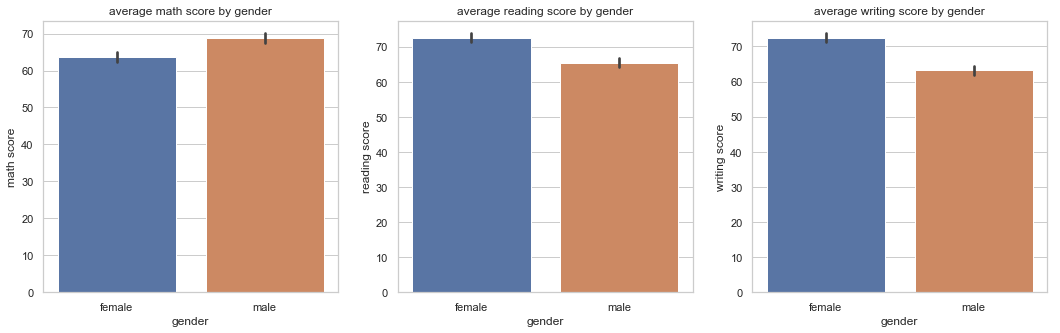

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['gender'], student_df['math score'])
plt.title('average math score by gender')

plt.subplot(1,3,2)
sns.barplot(student_df['gender'], student_df['reading score'])
plt.title('average reading score by gender')

plt.subplot(1,3,3)
sns.barplot(student_df['gender'], student_df['writing score'])
plt.title('average writing score by gender')
plt.show()

In [11]:
grades = student_df['gender'].unique()
grouped_df = student_df.groupby('gender')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                student_df[student_df['gender']==grades[i]][var], 
                student_df[student_df['gender']==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


all gender differences appear to be significant: males score higher in math, females score higher in reading and writing

In [7]:
student_df.groupby('race/ethnicity').mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


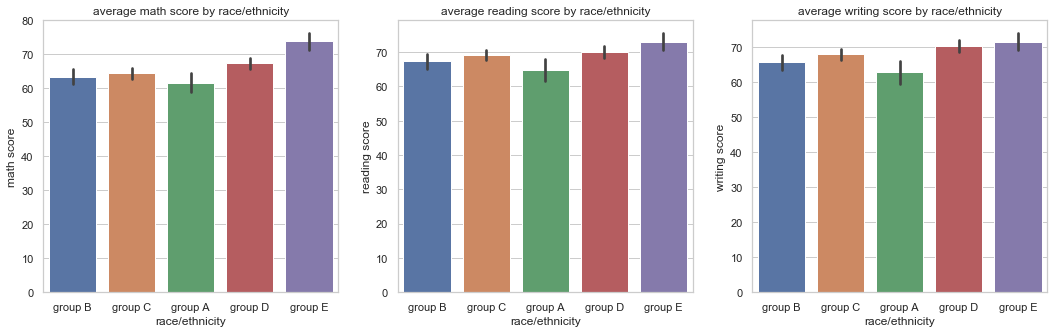

In [12]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.title('average math score by race/ethnicity')

plt.subplot(1,3,2)
sns.barplot(student_df['race/ethnicity'], student_df['reading score'])
plt.title('average reading score by race/ethnicity')

plt.subplot(1,3,3)
sns.barplot(student_df['race/ethnicity'], student_df['writing score'])
plt.title('average writing score by race/ethnicity')
plt.show()

In [13]:
grades = student_df['race/ethnicity'].unique()
grouped_df = student_df.groupby('race/ethnicity')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                student_df[student_df['race/ethnicity']==grades[i]][var], 
                student_df[student_df['race/ethnicity']==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


there appear to be significant differences: 
math- A,B,C,E & D; A,B,C,D & E
writing - A,B & D; A,B,C & E; A&C
reading - A,B,C,E & E; A & D, A & C

In [9]:
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


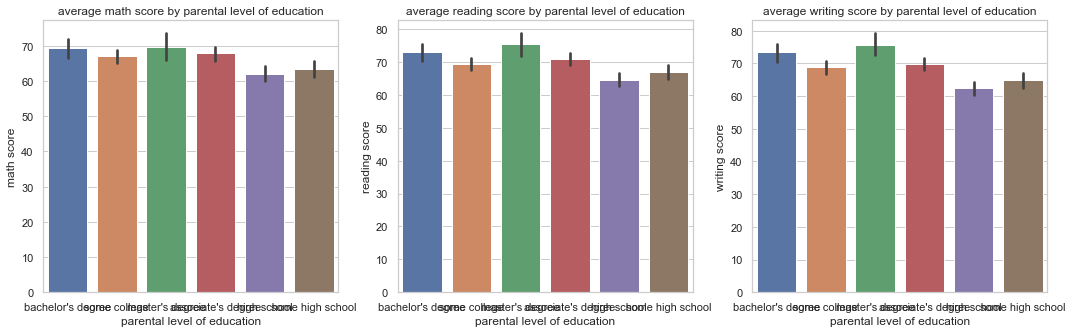

In [14]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['parental level of education'], student_df['math score'])
plt.title('average math score by parental level of education')

plt.subplot(1,3,2)
sns.barplot(student_df['parental level of education'], student_df['reading score'])
plt.title('average reading score by parental level of education')

plt.subplot(1,3,3)
sns.barplot(student_df['parental level of education'], student_df['writing score'])
plt.title('average writing score by parental level of education')
plt.show()

In [15]:
grades = student_df['parental level of education'].unique()
grouped_df = student_df.groupby('parental level of education')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                student_df[student_df['parental level of education']==grades[i]][var], 
                student_df[student_df['parental level of education']==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

In [23]:
student_df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

significant differences: 
math: BD & HS, SHS; SC & HS, SHS; MD & SHS; AD & HS, SHS
reading: B & SC, HS, SMS; SC & M, HS; M & AD, HS, SHS; AD & HS, SHS
writing: BD & SC, AD, HS, SHS; SC & MD, HS, SHS; MD & AD, HS, SHS; AD & SHS

##### question 2
Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [16]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [17]:
grades = student_df['lunch'].unique()
grouped_df = student_df.groupby('lunch')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                student_df[student_df['lunch']==grades[i]][var], 
                student_df[student_df['lunch']==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)


students with standard lunch perform significantly better than those with reduced lunch

##### question 3
Does the test preparation course seem to have an effect on the exam performances?

In [18]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [19]:
grades = student_df['test preparation course'].unique()
grouped_df = student_df.groupby('lunch')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(grades)):
        for j in range(i+1, len(grades)):
            print("t-test between groups {0} and {1}:".format(grades[i], grades[j]))
            print(stats.ttest_ind(
                student_df[student_df['test preparation course']==grades[i]][var], 
                student_df[student_df['test preparation course']==grades[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


yes, significant difference

##### question 4
Which 2 exam scores are most correlated with each other?

In [20]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


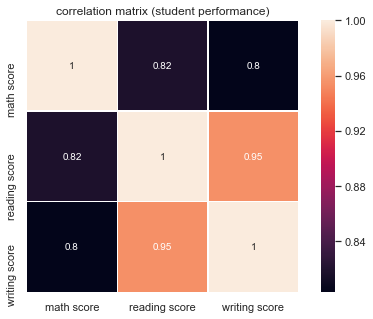

In [22]:
corrmat_student = student_df.corr()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (student performance)")

plt.show()

reading & writing are most closely correlated